# Lecture 3 Exercises: Matrix Multiplication and Inverse

This notebook provides hands-on practice for understanding matrix multiplication from multiple perspectives.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

print("NumPy imported successfully")

NumPy imported successfully


## Exercise 1: Four Perspectives of Matrix Multiplication

Given two matrices:
$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \quad
B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
$$

Compute $C = AB$ using **all four perspectives**.

In [5]:
# Define matrices A and B
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

# Verify with NumPy
C_numpy = A @ B
print("\nExpected result C = AB:")
print(C_numpy)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

Expected result C = AB:
[[19 22]
 [43 50]]


### Perspective 1: Element-by-Element (Row × Column)

Each element $C_{ij}$ is computed by:
$$
C_{ij} = \sum_{k=1}^n A_{ik} \cdot B_{kj}
$$

**Your task:** Implement the element-by-element multiplication.

In [6]:
def multiply_element_wise(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Compute C = AB using element-by-element (row × column) method.
    
    For each element C[i,j], compute the dot product of:
    - Row i of A
    - Column j of B
    """
    m, n = A.shape
    n2, p = B.shape
    assert n == n2, "Matrix dimensions don't match!"
    
    C = np.zeros((m, p))
    
    # TODO: Implement element-by-element multiplication
    # Hint: Use nested loops for i, j, and k
    # C[i,j] = sum of A[i,k] * B[k,j] for all k
    
    # YOUR CODE HERE
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i,j]+=A[i,k]*B[k,j]
    return C

# Test your implementation
C_element = multiply_element_wise(A, B)
print("Result using element-by-element:")
print(C_element)
print(f"\nMatches NumPy result: {np.allclose(C_element, C_numpy)}")

Result using element-by-element:
[[19. 22.]
 [43. 50.]]

Matches NumPy result: True


**Manual calculation for verification:**

$$
C_{00} = 1 \cdot 5 + 2 \cdot 7 = 5 + 14 = 19
$$
$$
C_{01} = 1 \cdot 6 + 2 \cdot 8 = 6 + 16 = 22
$$
$$
C_{10} = 3 \cdot 5 + 4 \cdot 7 = 15 + 28 = 43
$$
$$
C_{11} = 3 \cdot 6 + 4 \cdot 8 = 18 + 32 = 50
$$

### Perspective 2: Column View

**Key insight:** Each column of $C$ is $A$ times the corresponding column of $B$.

$$
C = \begin{bmatrix} | & | \\ Ab_1 & Ab_2 \\ | & | \end{bmatrix}
$$

where $b_1, b_2$ are columns of $B$.

In [7]:
def multiply_column_view(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Compute C = AB using column perspective.
    
    Each column of C is A times the corresponding column of B.
    """
    m, n = A.shape
    n2, p = B.shape
    assert n == n2, "Matrix dimensions don't match!"
    
    C = np.zeros((m, p))
    
    # TODO: Implement column-wise multiplication
    # Hint: Loop over columns of B
    # C[:, j] = A @ B[:, j]
    
    for j in range(p):
        C[:,j]=A@B[:,j]
    
    return C

# Test your implementation
C_column = multiply_column_view(A, B)
print("Result using column view:")
print(C_column)
print(f"\nMatches NumPy result: {np.allclose(C_column, C_numpy)}")

Result using column view:
[[19. 22.]
 [43. 50.]]

Matches NumPy result: True


**Manual calculation for column 1 of C:**

$$
Ab_1 = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 \\ 7 \end{bmatrix}
= 5 \begin{bmatrix} 1 \\ 3 \end{bmatrix} + 7 \begin{bmatrix} 2 \\ 4 \end{bmatrix}
= \begin{bmatrix} 5 \\ 15 \end{bmatrix} + \begin{bmatrix} 14 \\ 28 \end{bmatrix}
= \begin{bmatrix} 19 \\ 43 \end{bmatrix}
$$

### Perspective 3: Row View

**Key insight:** Each row of $C$ is the corresponding row of $A$ times $B$.

$$
C = \begin{bmatrix} — & a_1B & — \\ — & a_2B & — \end{bmatrix}
$$

where $a_1, a_2$ are rows of $A$.

In [9]:
def multiply_row_view(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Compute C = AB using row perspective.
    
    Each row of C is the corresponding row of A times B.
    """
    m, n = A.shape
    n2, p = B.shape
    assert n == n2, "Matrix dimensions don't match!"
    
    C = np.zeros((m, p))
    
    # TODO: Implement row-wise multiplication
    # Hint: Loop over rows of A
    # C[i, :] = A[i, :] @ B
    
    # YOUR CODE HERE
    for i in range(m):
        C[i,:]=A[i,:]@B
    return C

# Test your implementation
C_row = multiply_row_view(A, B)
print("Result using row view:")
print(C_row)
print(f"\nMatches NumPy result: {np.allclose(C_row, C_numpy)}")

Result using row view:
[[19. 22.]
 [43. 50.]]

Matches NumPy result: True


**Manual calculation for row 1 of C:**

$$
a_1B = \begin{bmatrix} 1 & 2 \end{bmatrix} \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
= \begin{bmatrix} 1 \cdot 5 + 2 \cdot 7 & 1 \cdot 6 + 2 \cdot 8 \end{bmatrix}
= \begin{bmatrix} 19 & 22 \end{bmatrix}
$$

### Perspective 4: Column × Row (Rank-1 Matrices)

**Key insight:** $AB$ is a sum of rank-1 matrices (outer products).

$$
AB = \sum_{k=1}^n (\text{column } k \text{ of } A) \times (\text{row } k \text{ of } B)
$$

Each term is a **rank-1 matrix** formed by the outer product of a column and a row.

In [10]:
def multiply_rank1_view(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """
    Compute C = AB using rank-1 (column × row) perspective.
    
    C = sum of outer products: column_k(A) × row_k(B)
    """
    m, n = A.shape
    n2, p = B.shape
    assert n == n2, "Matrix dimensions don't match!"
    
    C = np.zeros((m, p))
    
    # TODO: Implement rank-1 multiplication
    # Hint: Loop over k from 0 to n-1
    # Add np.outer(A[:, k], B[k, :]) to C
    
    # YOUR CODE HERE

    for k in range(n):
        C+=np.outer(A[:,k],B[k,:])
    
    return C

# Test your implementation
C_rank1 = multiply_rank1_view(A, B)
print("Result using rank-1 view:")
print(C_rank1)
print(f"\nMatches NumPy result: {np.allclose(C_rank1, C_numpy)}")

Result using rank-1 view:
[[19. 22.]
 [43. 50.]]

Matches NumPy result: True


**Manual calculation - decomposition into rank-1 matrices:**

$$
AB = \begin{bmatrix} 1 \\ 3 \end{bmatrix} \begin{bmatrix} 5 & 6 \end{bmatrix}
+ \begin{bmatrix} 2 \\ 4 \end{bmatrix} \begin{bmatrix} 7 & 8 \end{bmatrix}
$$

$$
= \begin{bmatrix} 5 & 6 \\ 15 & 18 \end{bmatrix}
+ \begin{bmatrix} 14 & 16 \\ 28 & 32 \end{bmatrix}
= \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$

Let's visualize this decomposition:

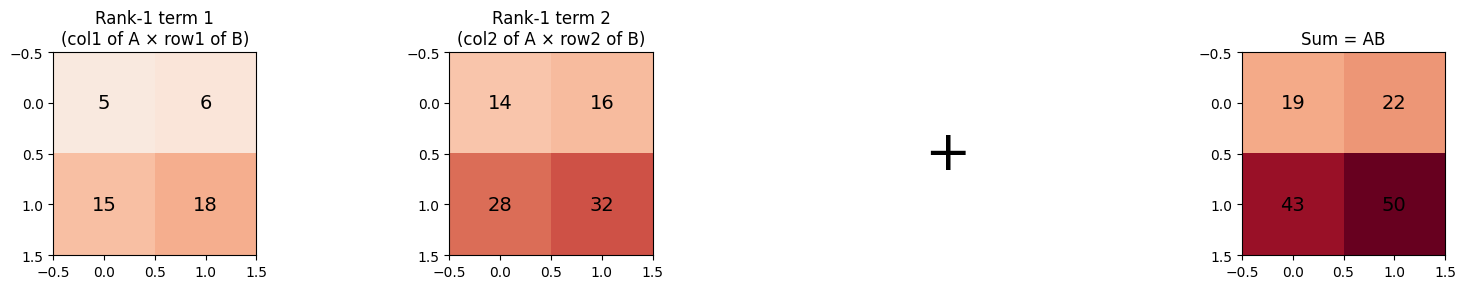


Rank-1 term 1:
[[ 5  6]
 [15 18]]

Rank-1 term 2:
[[14 16]
 [28 32]]

Sum:
[[19 22]
 [43 50]]


In [11]:
# Visualize the rank-1 decomposition
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

# First rank-1 term
rank1_term1 = np.outer(A[:, 0], B[0, :])
axes[0].imshow(rank1_term1, cmap='RdBu_r', vmin=-50, vmax=50)
axes[0].set_title('Rank-1 term 1\n(col1 of A × row1 of B)')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{rank1_term1[i,j]:.0f}', 
                    ha='center', va='center', fontsize=14)

# Second rank-1 term
rank1_term2 = np.outer(A[:, 1], B[1, :])
axes[1].imshow(rank1_term2, cmap='RdBu_r', vmin=-50, vmax=50)
axes[1].set_title('Rank-1 term 2\n(col2 of A × row2 of B)')
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{rank1_term2[i,j]:.0f}', 
                    ha='center', va='center', fontsize=14)

# Plus sign
axes[2].text(0.5, 0.5, '+', fontsize=40, ha='center', va='center')
axes[2].axis('off')

# Final result
axes[3].imshow(C_numpy, cmap='RdBu_r', vmin=-50, vmax=50)
axes[3].set_title('Sum = AB')
for i in range(2):
    for j in range(2):
        axes[3].text(j, i, f'{C_numpy[i,j]:.0f}', 
                    ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

print("\nRank-1 term 1:")
print(rank1_term1)
print("\nRank-1 term 2:")
print(rank1_term2)
print("\nSum:")
print(rank1_term1 + rank1_term2)

## Exercise 2: Larger Matrix Example

Test all four methods on a 3×3 matrix multiplication.

In [12]:
# Define larger matrices
A_large = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

B_large = np.array([[9, 8, 7],
                    [6, 5, 4],
                    [3, 2, 1]])

print("Matrix A:")
print(A_large)
print("\nMatrix B:")
print(B_large)

# Expected result
C_expected = A_large @ B_large
print("\nExpected C = AB:")
print(C_expected)

# Test all four methods
print("\n" + "="*50)
print("Testing all four perspectives:")
print("="*50)

methods = [
    ("Element-wise", multiply_element_wise),
    ("Column view", multiply_column_view),
    ("Row view", multiply_row_view),
    ("Rank-1 view", multiply_rank1_view)
]

for name, func in methods:
    result = func(A_large, B_large)
    matches = np.allclose(result, C_expected)
    print(f"{name:15s}: {'✓' if matches else '✗'}")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Expected C = AB:
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]

Testing all four perspectives:
Element-wise   : ✓
Column view    : ✓
Row view       : ✓
Rank-1 view    : ✓


## Exercise 3: Matrix Inverse

Find the inverse of:
$$
A = \begin{bmatrix} 2 & 1 \\ 5 & 3 \end{bmatrix}
$$

Using the formula for 2×2 matrices:
$$
A^{-1} = \frac{1}{ad-bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

In [13]:
def inverse_2x2(A: np.ndarray) -> np.ndarray:
    """
    Compute the inverse of a 2×2 matrix.
    
    Returns None if matrix is singular (det = 0).
    """
    assert A.shape == (2, 2), "Matrix must be 2×2"
    
    # TODO: Extract elements a, b, c, d
    # TODO: Compute determinant
    # TODO: Check if determinant is zero
    # TODO: Return inverse matrix
    
    # YOUR CODE HERE
    if np.linalg.det(A)==0:
        return None
    else:
        return np.linalg.inv(A)

# Test matrix
A_test = np.array([[2, 1],
                   [5, 3]])

print("Matrix A:")
print(A_test)

# Compute inverse
A_inv = inverse_2x2(A_test)

if A_inv is not None:
    print("\nInverse A^-1:")
    print(A_inv)
    
    # Verify: A * A^-1 should equal I
    identity = A_test @ A_inv
    print("\nVerification A @ A^-1:")
    print(identity)
    
    print(f"\nIs identity? {np.allclose(identity, np.eye(2))}")
    
    # Compare with NumPy
    print("\nNumPy result:")
    print(np.linalg.inv(A_test))
else:
    print("\nMatrix is singular (no inverse exists)")

Matrix A:
[[2 1]
 [5 3]]

Inverse A^-1:
[[ 3. -1.]
 [-5.  2.]]

Verification A @ A^-1:
[[1.00000000e+00 0.00000000e+00]
 [1.77635684e-15 1.00000000e+00]]

Is identity? True

NumPy result:
[[ 3. -1.]
 [-5.  2.]]


## Exercise 4: Singular Matrix Example

Verify that the matrix:
$$
A = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}
$$

has no inverse by:
1. Computing its determinant
2. Finding a non-zero vector $x$ such that $Ax = 0$
3. Using the contradiction proof from lecture notes

In [14]:
# Singular matrix
A_singular = np.array([[1, 2],
                       [2, 4]])

print("Matrix A:")
print(A_singular)

# 1. Compute determinant
det = np.linalg.det(A_singular)
print(f"\nDeterminant: {det}")

# 2. Find non-zero x such that Ax = 0
x = np.array([2, -1])
result = A_singular @ x

print(f"\nTest vector x = {x}")
print(f"Ax = {result}")
print(f"Is Ax = 0? {np.allclose(result, 0)}")

# 3. Try to compute inverse (should fail)
try:
    A_inv = np.linalg.inv(A_singular)
    print("\nInverse computed (unexpected!)")
except np.linalg.LinAlgError:
    print("\n✓ Matrix is singular - no inverse exists!")

# Visualize column dependency
print("\n" + "="*50)
print("Column dependency:")
print("="*50)
print(f"Column 1: {A_singular[:, 0]}")
print(f"Column 2: {A_singular[:, 1]}")
print(f"Column 2 = 2 × Column 1? {np.allclose(A_singular[:, 1], 2 * A_singular[:, 0])}")

Matrix A:
[[1 2]
 [2 4]]

Determinant: 0.0

Test vector x = [ 2 -1]
Ax = [0 0]
Is Ax = 0? True

✓ Matrix is singular - no inverse exists!

Column dependency:
Column 1: [1 2]
Column 2: [2 4]
Column 2 = 2 × Column 1? True


## Summary

You've now practiced:

1. **Four perspectives of matrix multiplication:**
   - Element-by-element (most computational)
   - Column view (understanding linear combinations)
   - Row view (dual of column view)
   - Rank-1 view (most insightful for theory)

2. **Matrix inverse:**
   - Computing 2×2 inverse using formula
   - Verifying inverse property: $AA^{-1} = I$
   - Understanding singular matrices

3. **Key insights:**
   - All four methods give the same result
   - Rank-1 decomposition shows deep structure
   - Singular matrices have dependent columns and no inverse